130


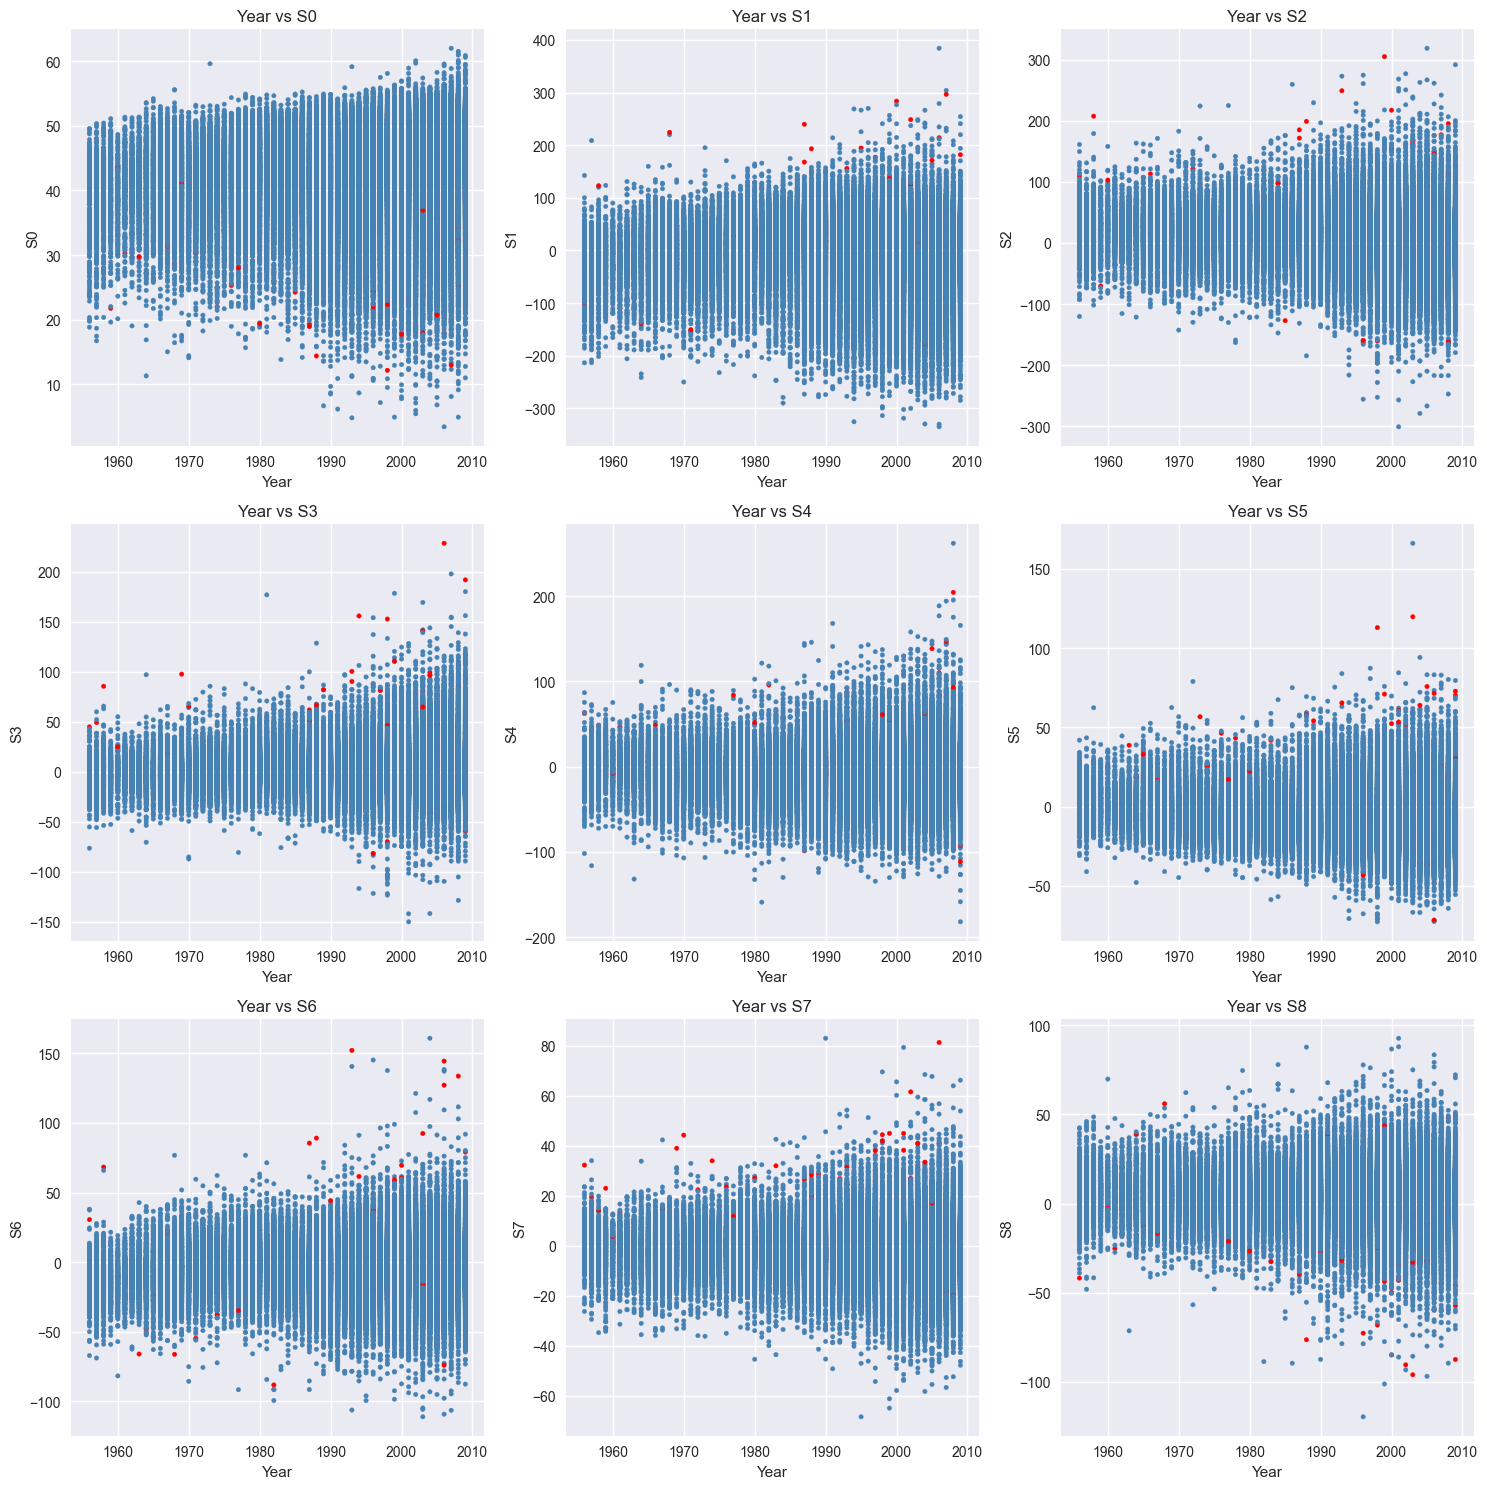

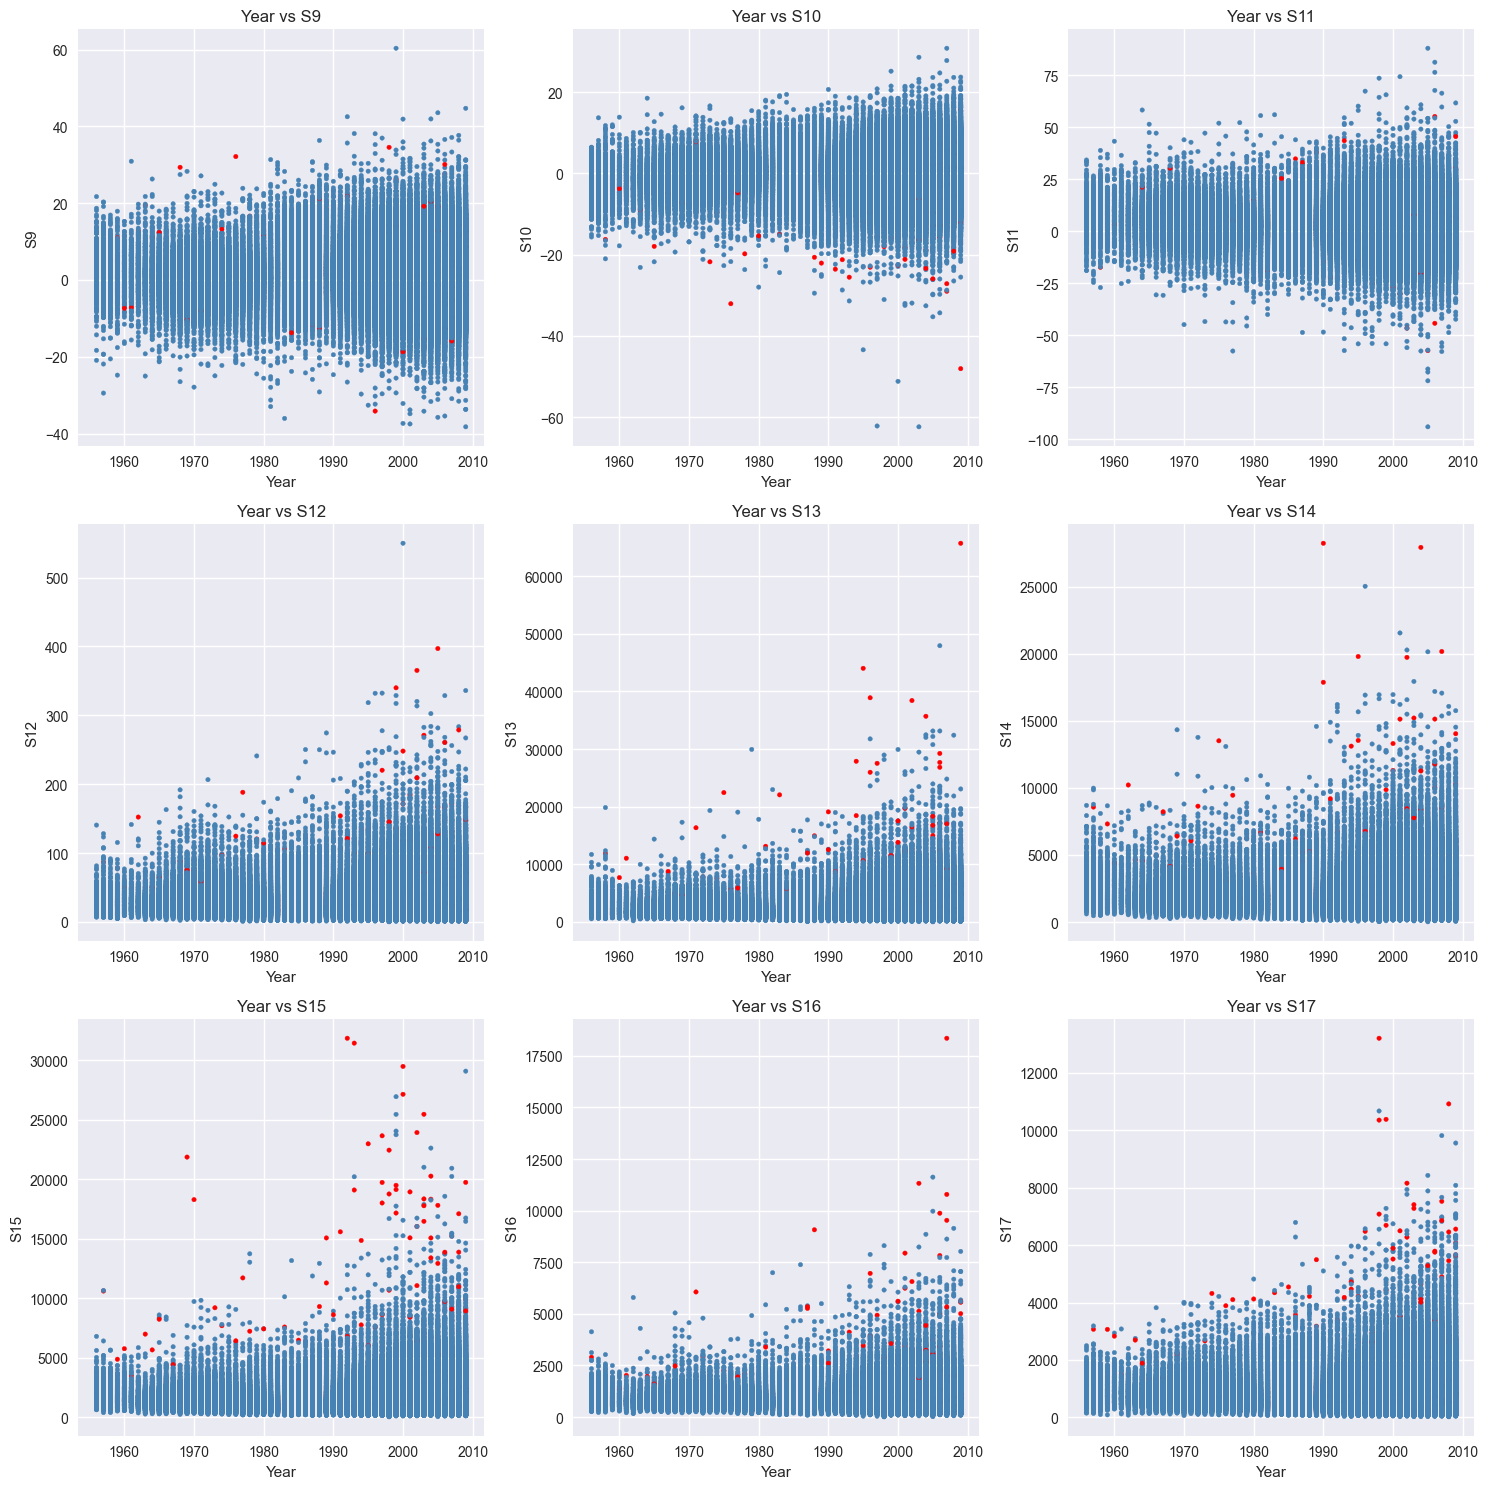

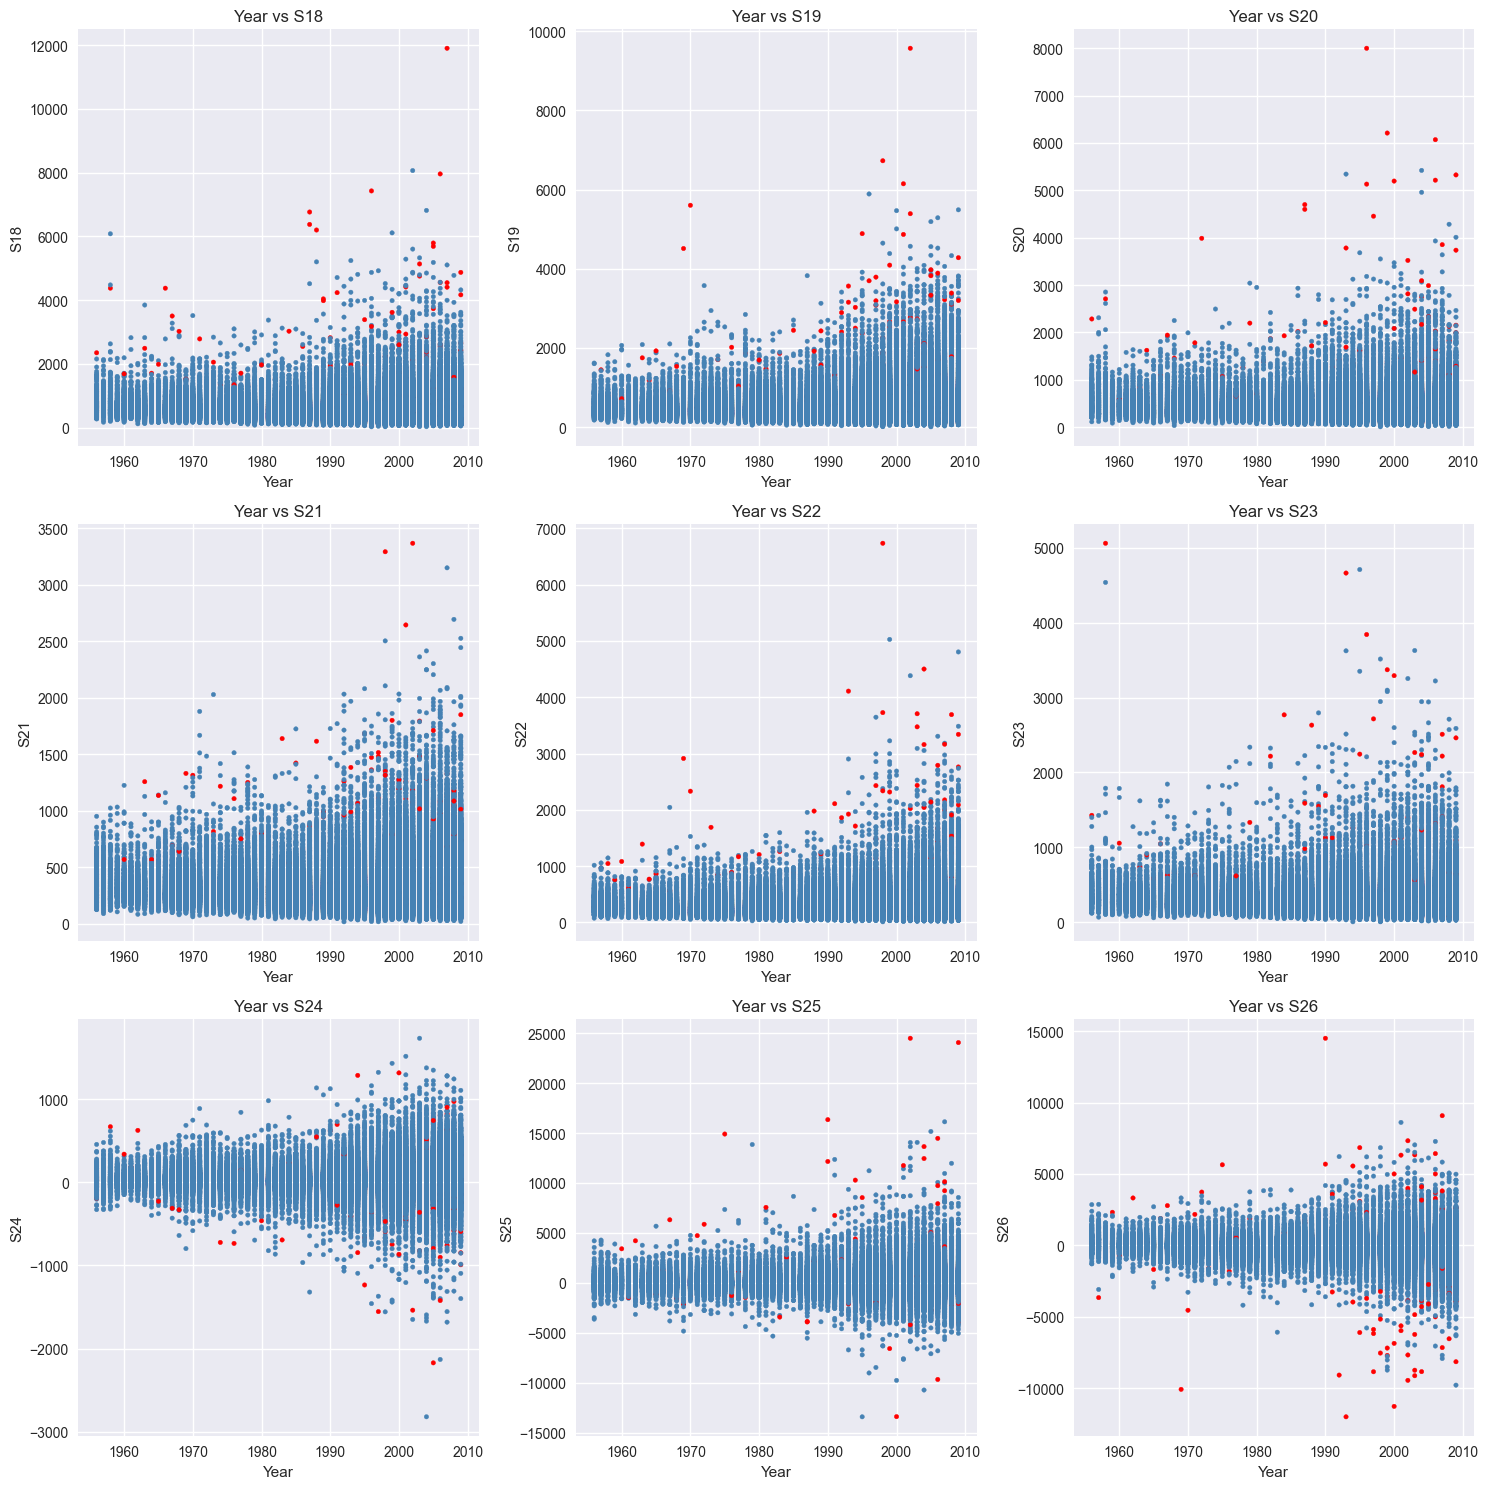

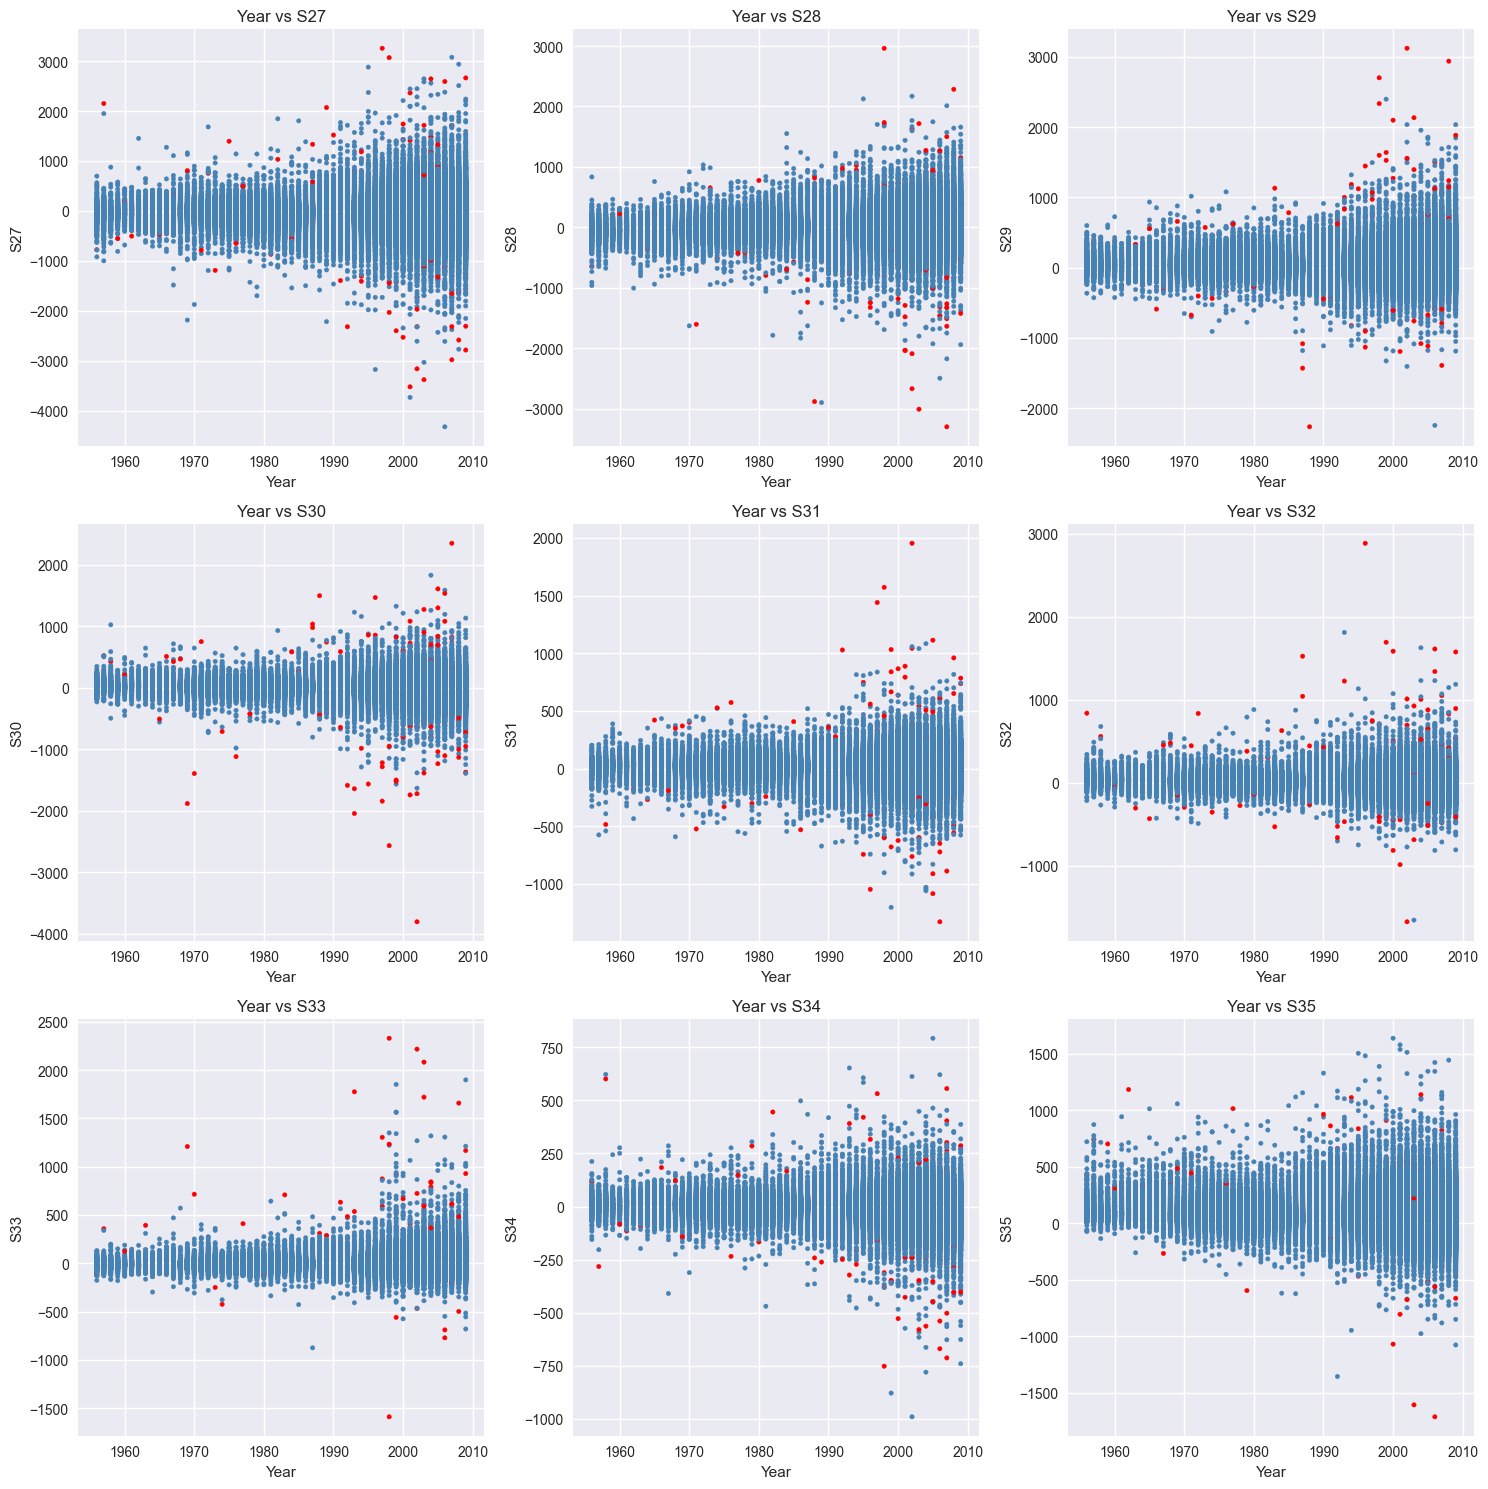

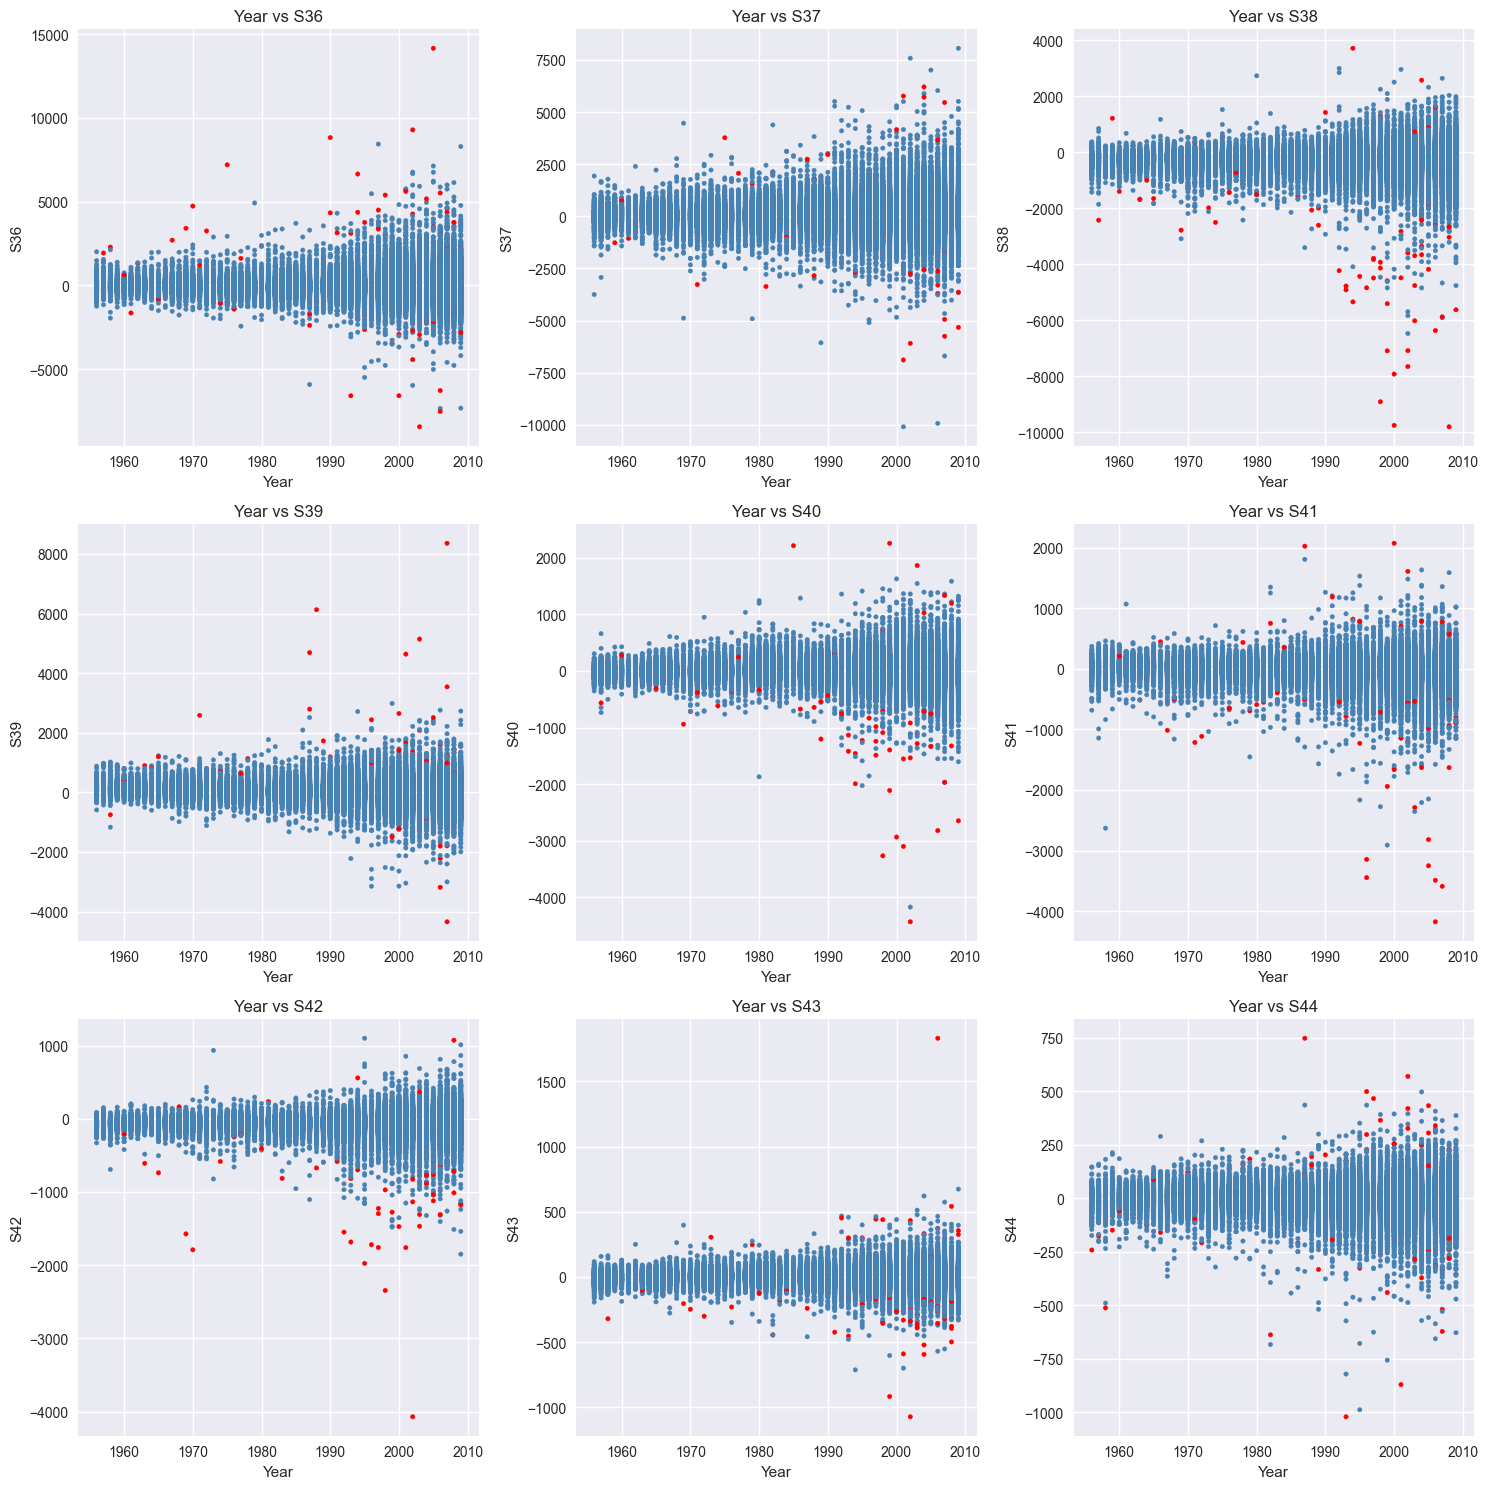

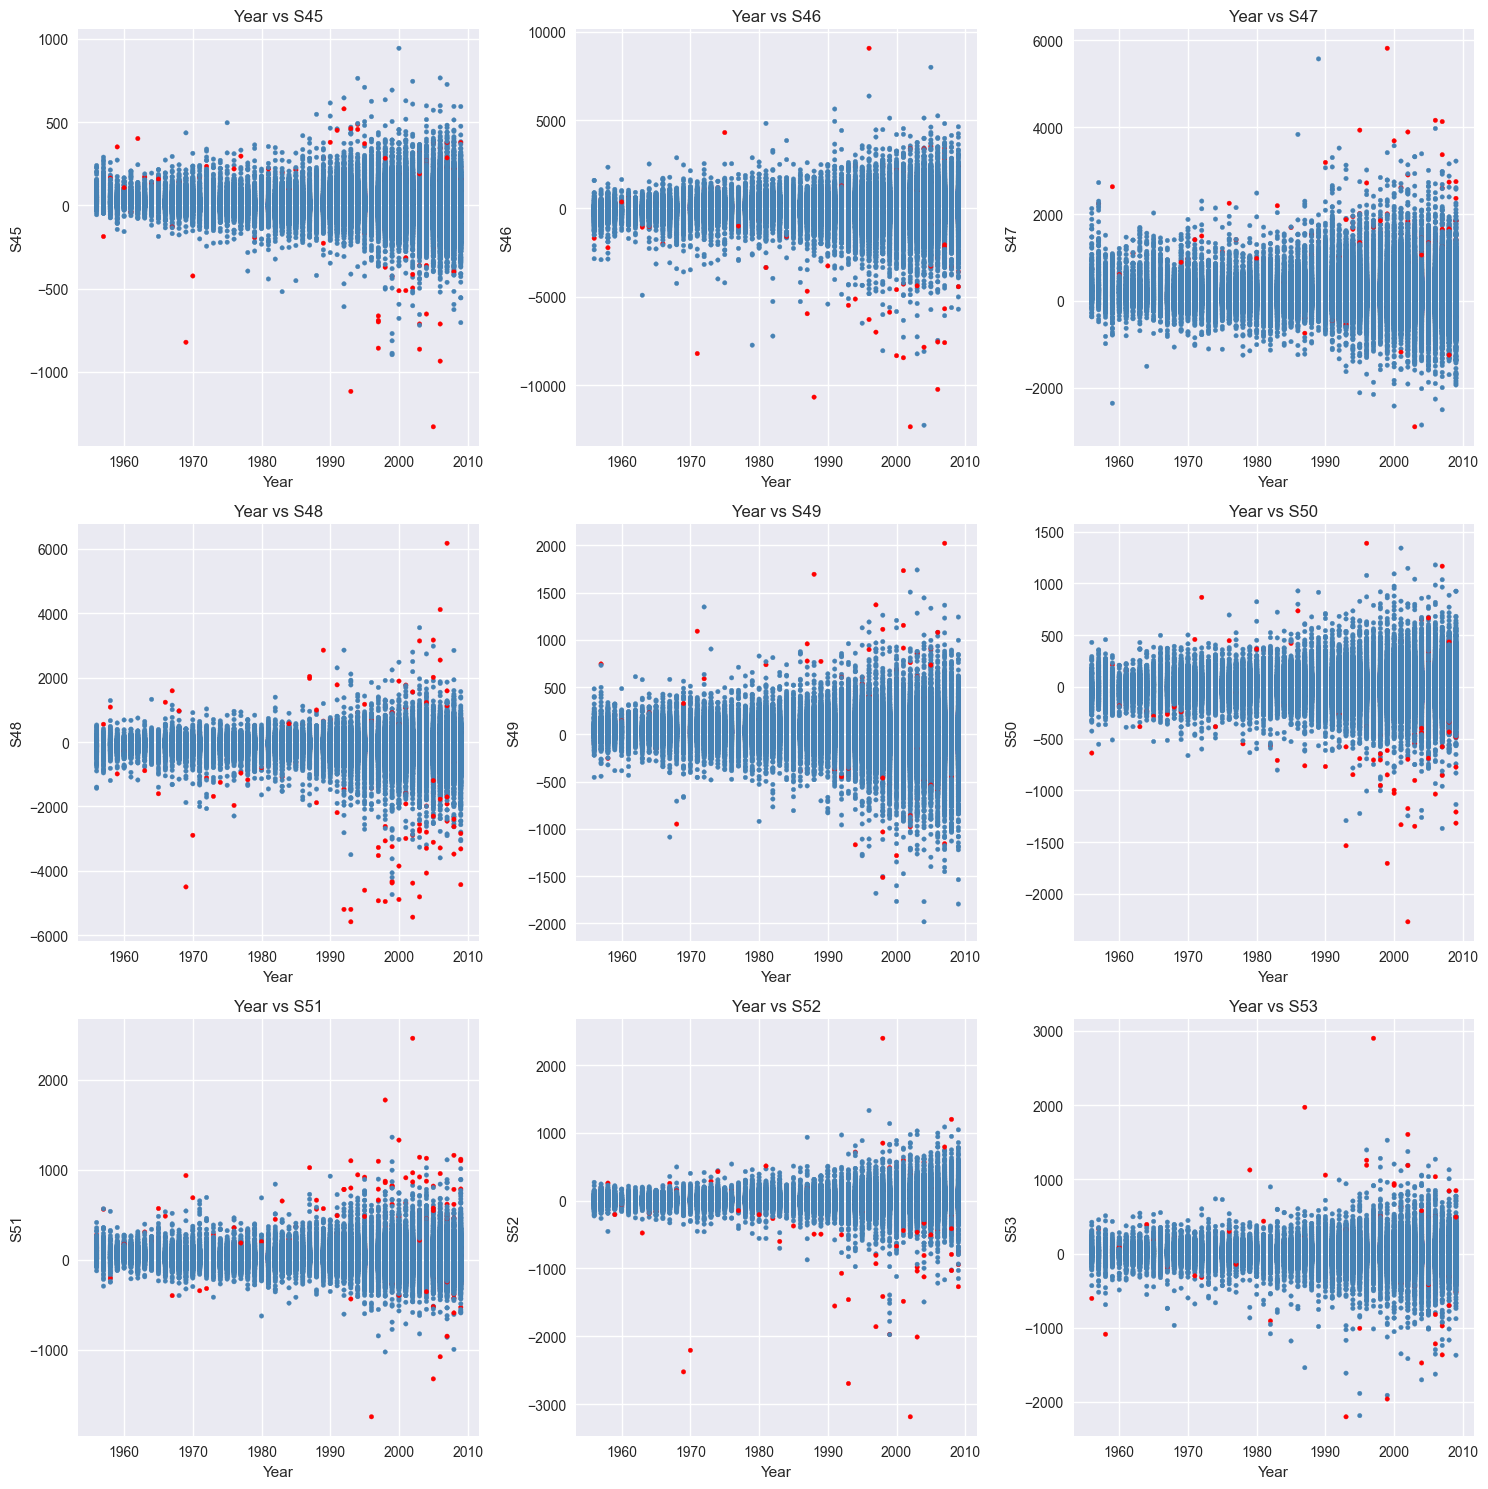

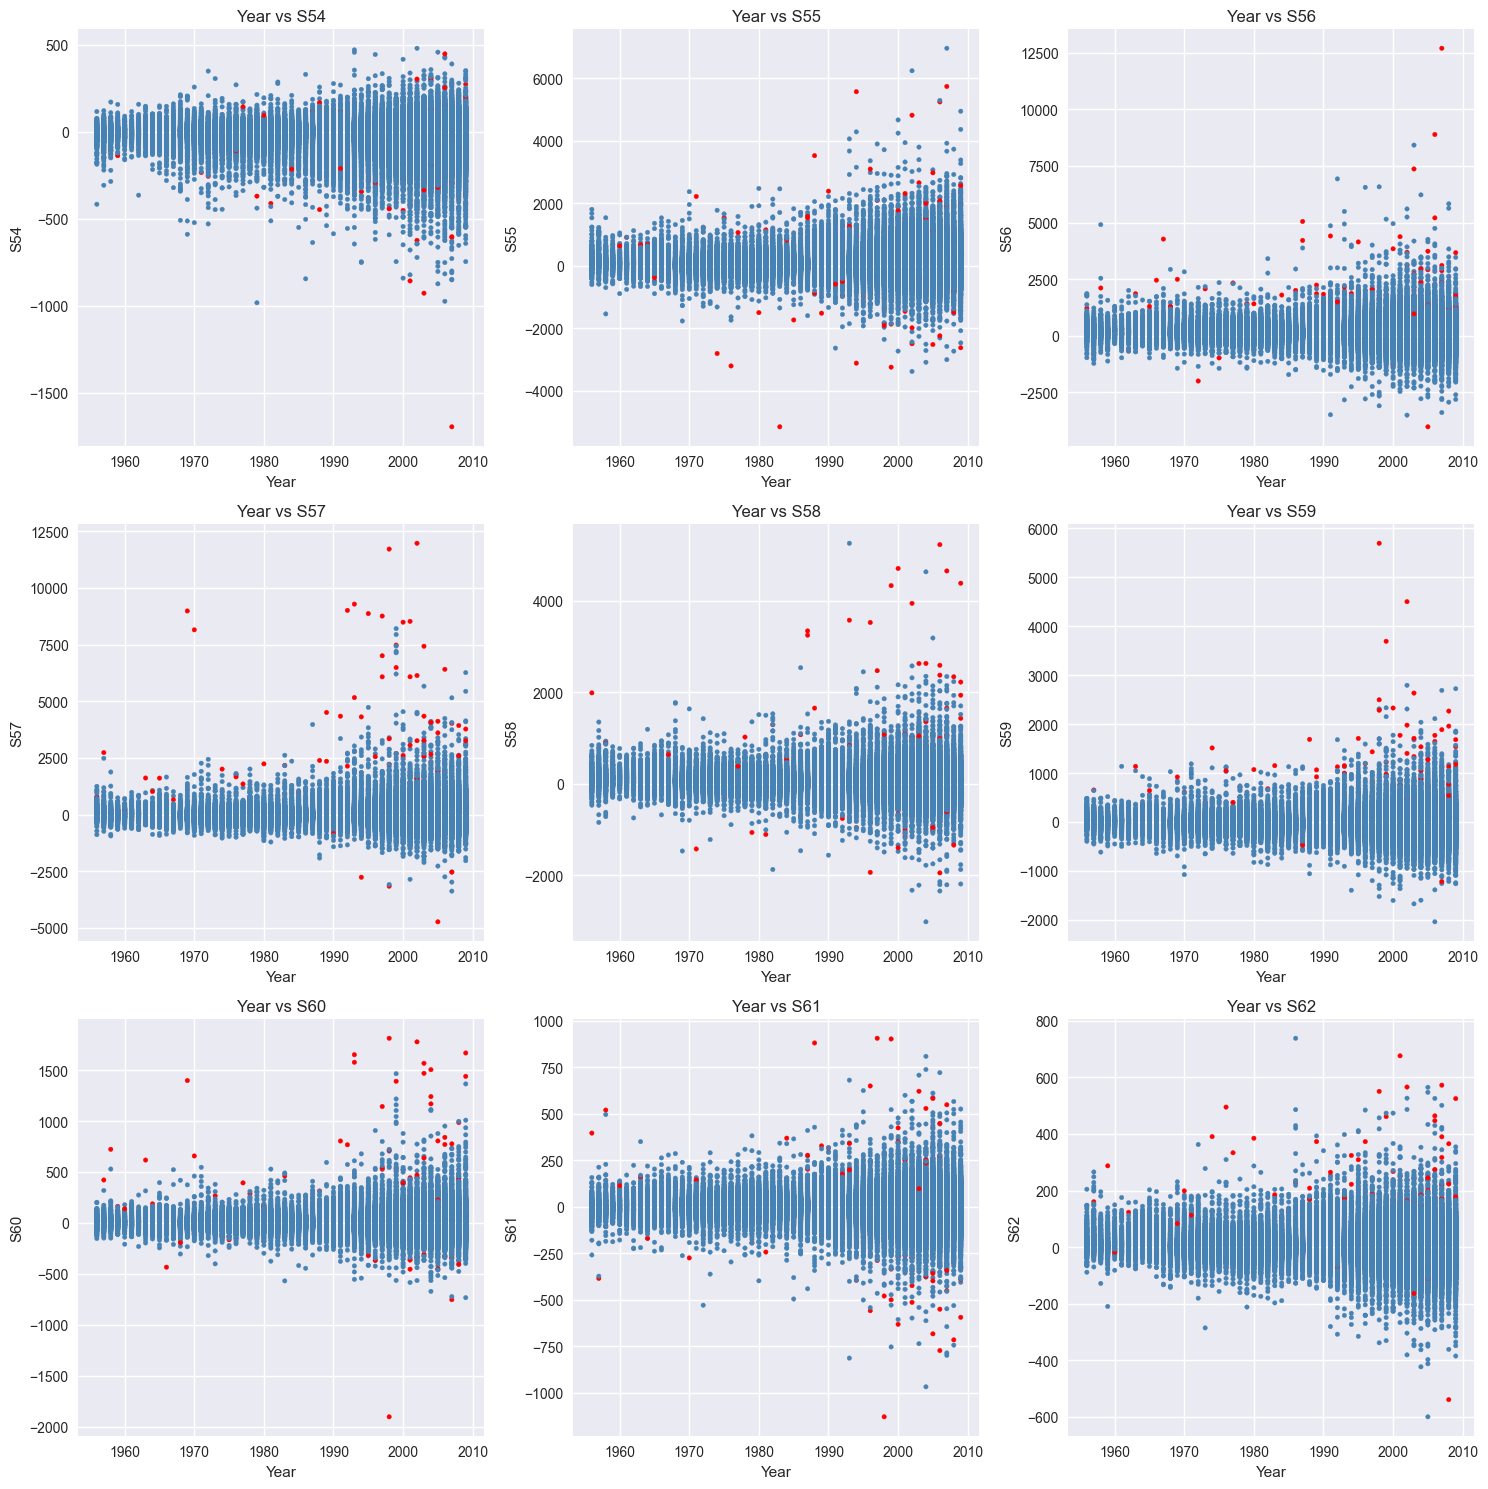

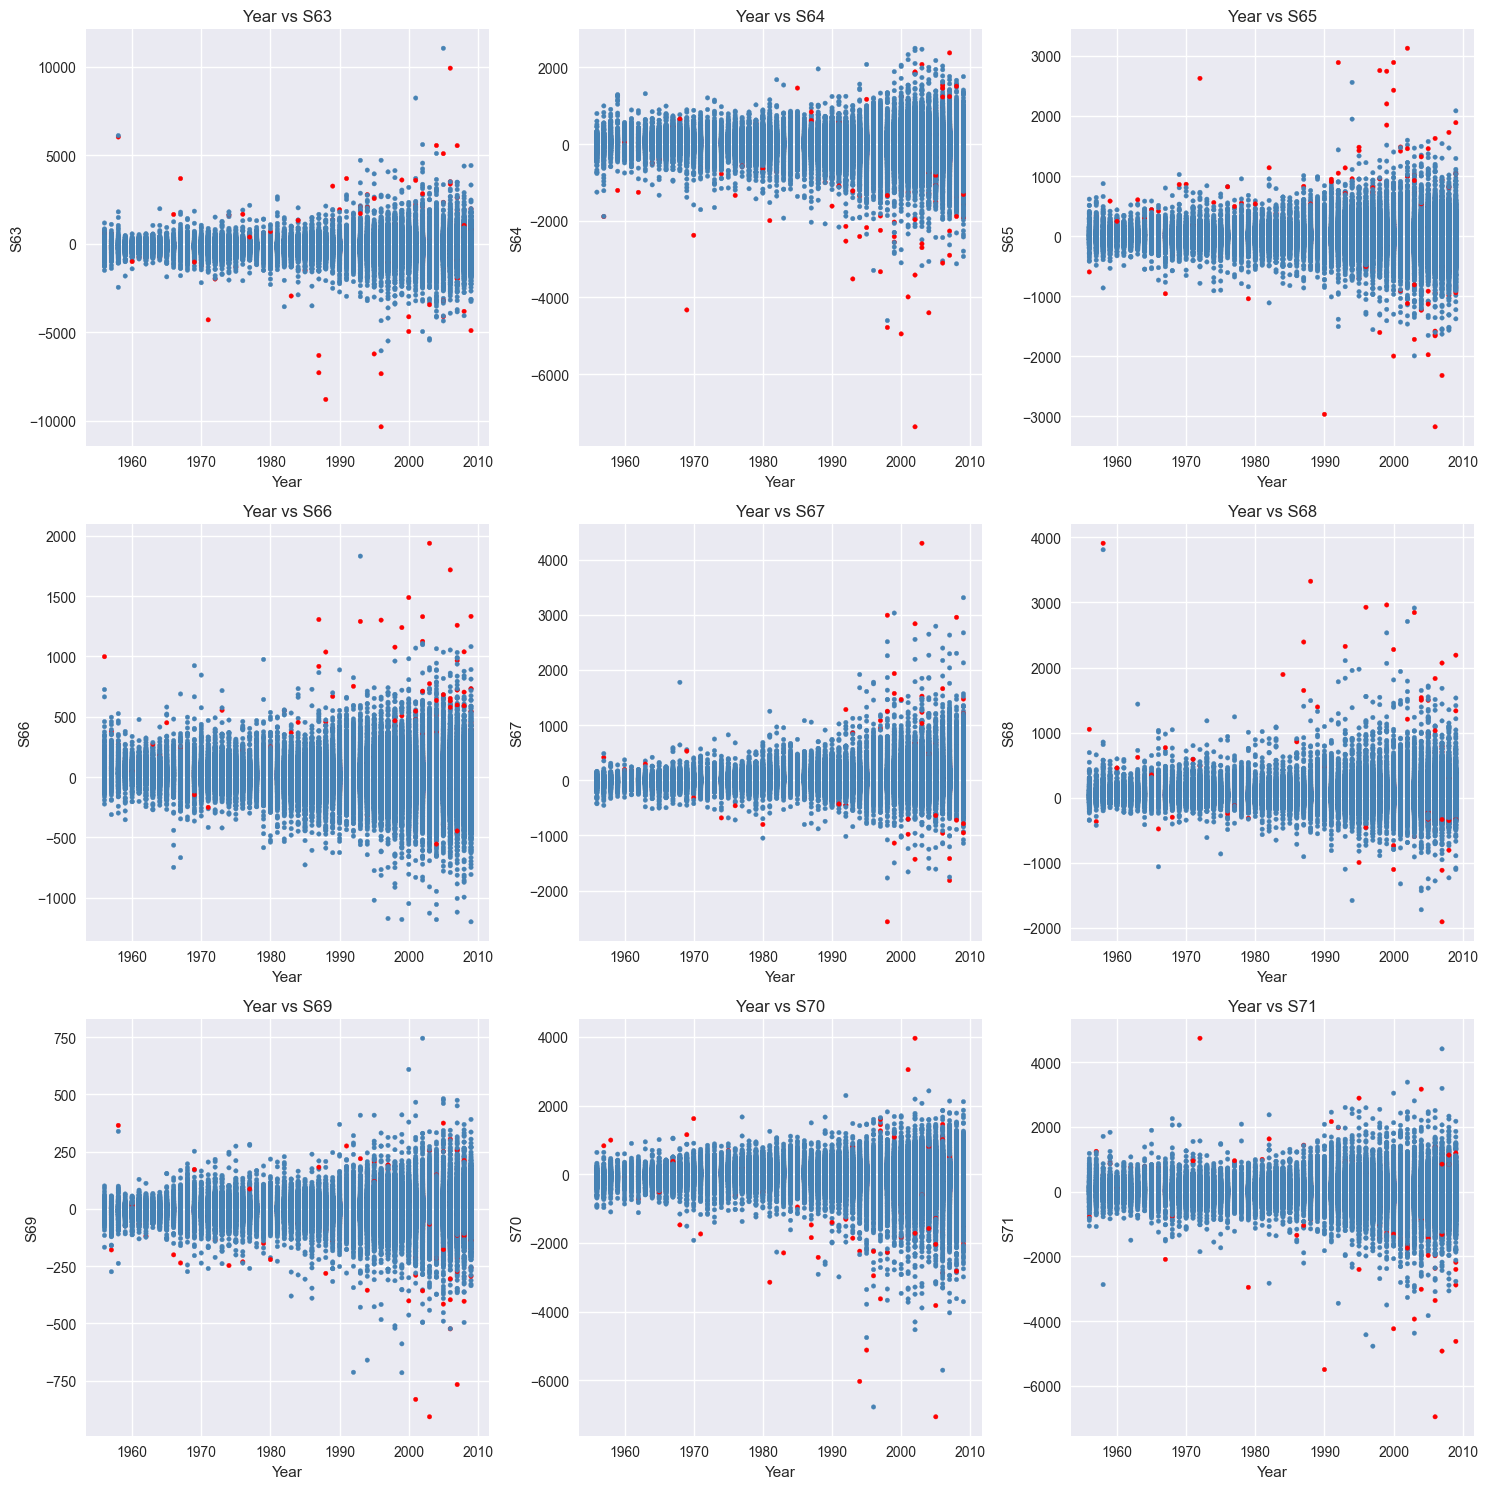

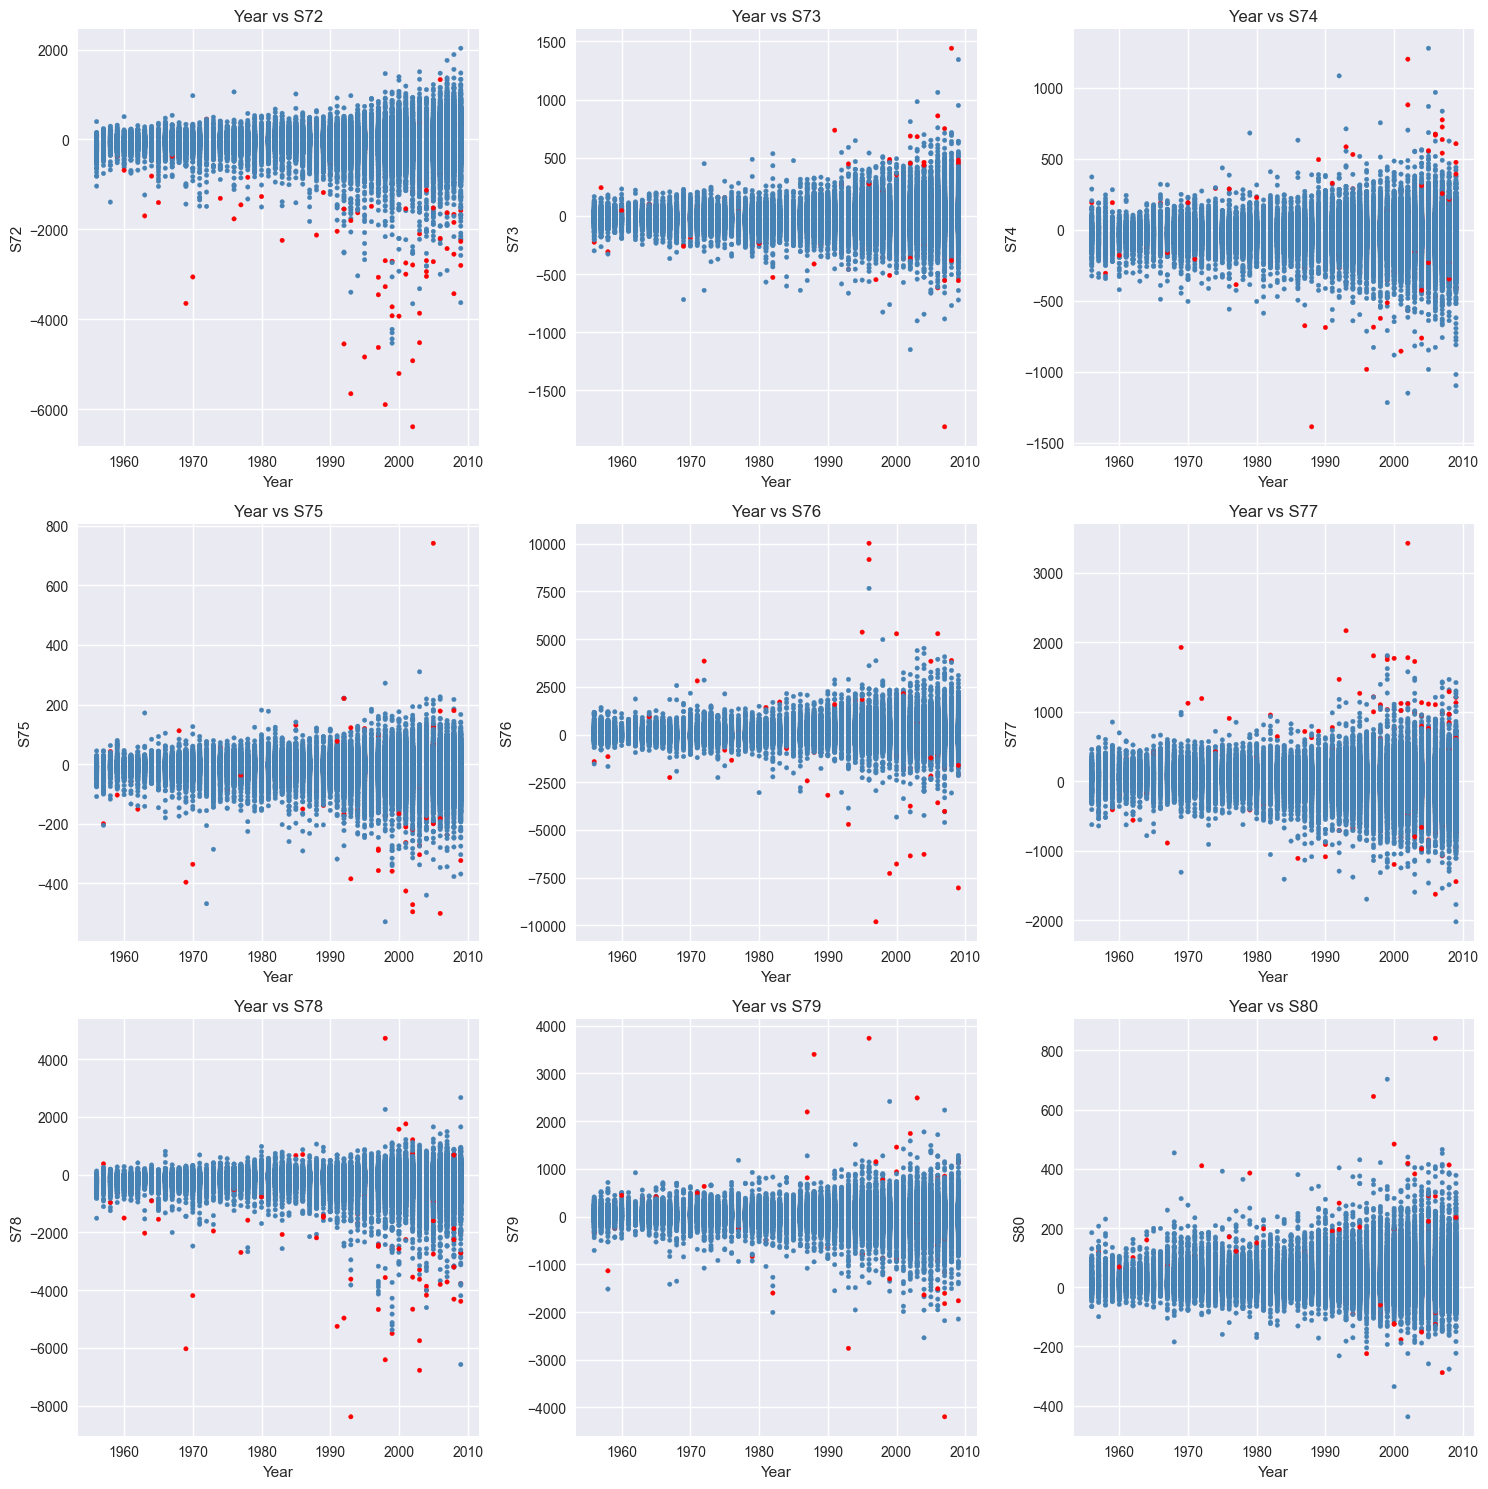

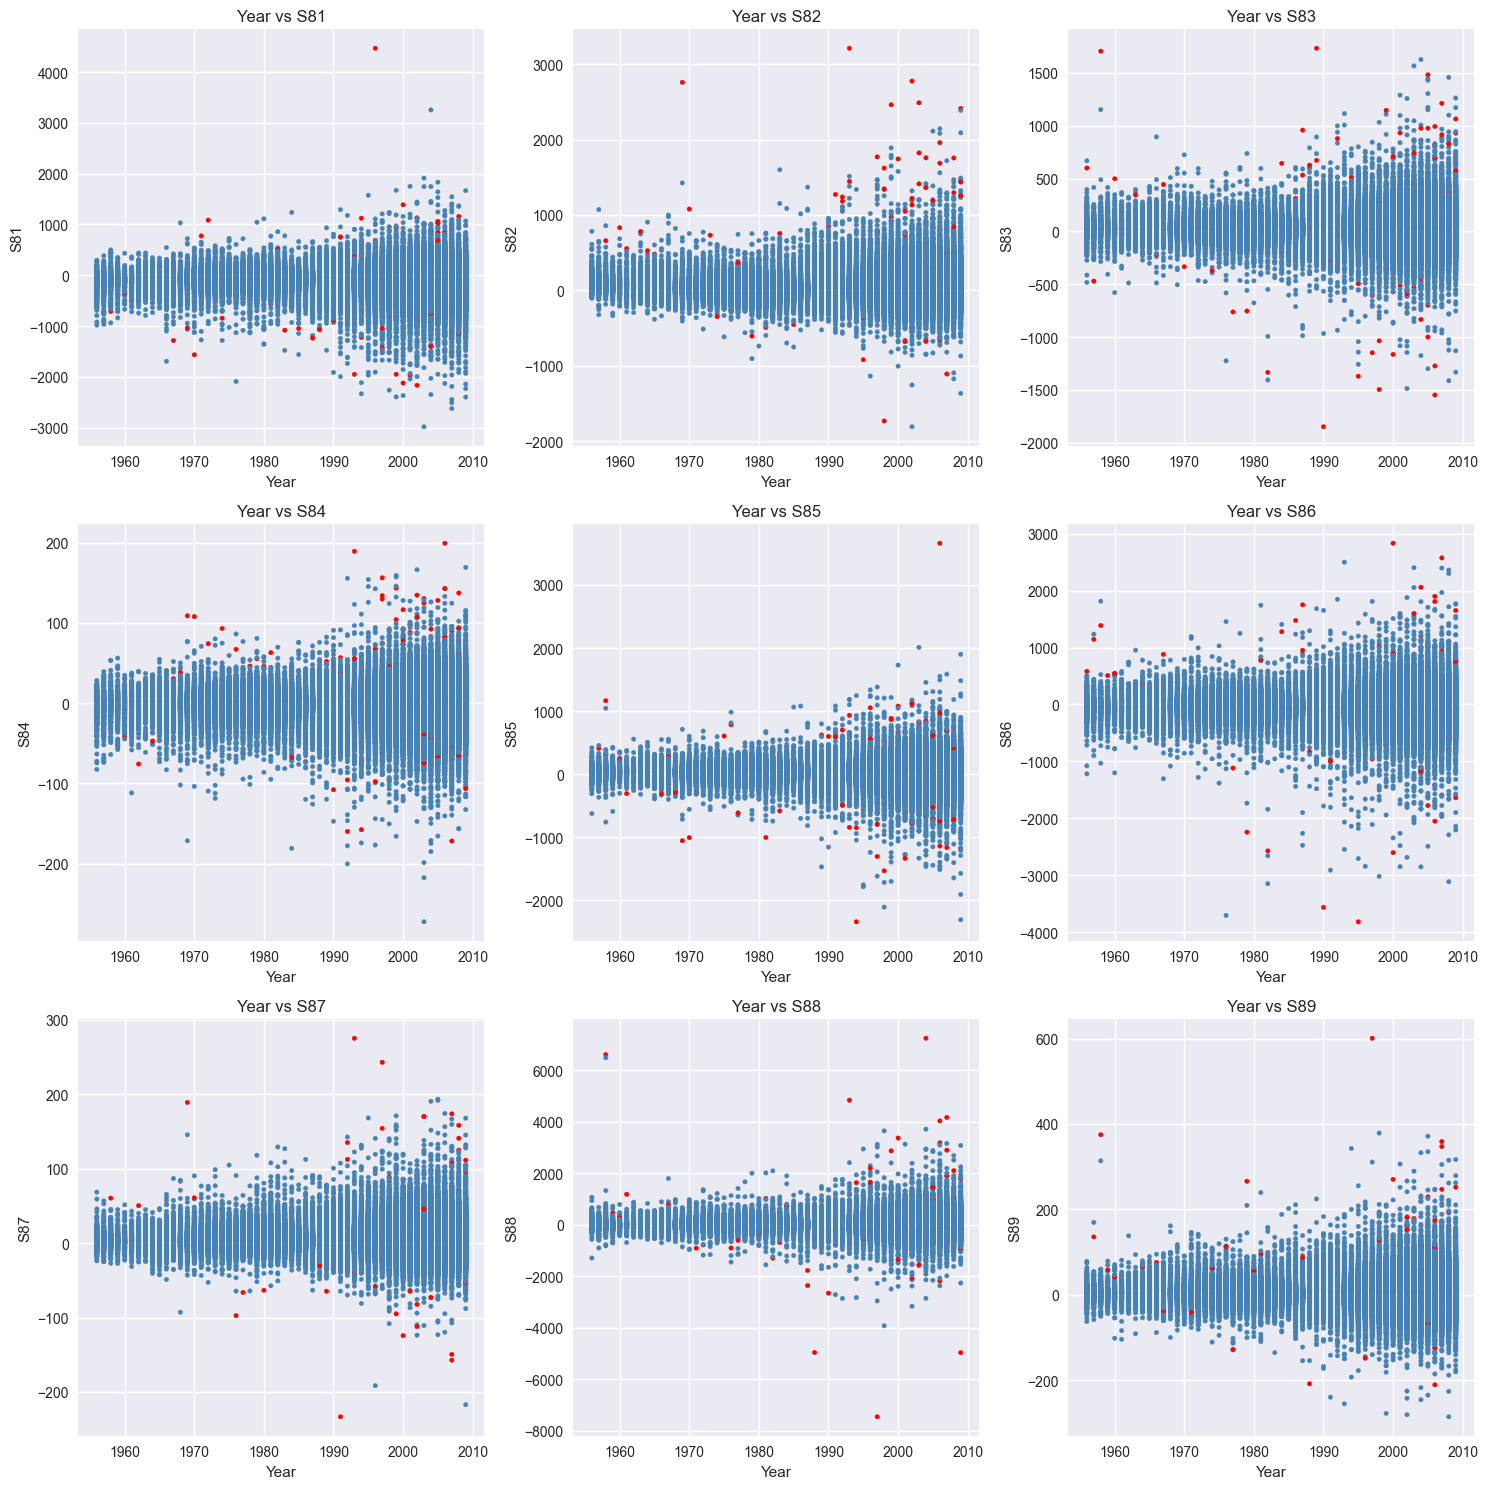

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

plt.style.use("seaborn-v0_8")

random_state = 42

df = pd.read_csv("train.csv")

columns = [col for col in df.columns if col != "Year"]

outliers = pd.Series(index=df.index, dtype=bool)

for year in df["Year"].unique():
    subset = df[df["Year"] == year]
    clf = IsolationForest(
        max_samples=1.0,
        contamination=0.0004,
        n_jobs=-1,
        random_state=random_state,
    )
    outliers[subset.index] = clf.fit_predict(subset[columns]) == -1

print(outliers.sum())

max_subplots = 9

for i in range(0, len(columns), max_subplots):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for j, col in enumerate(columns[i : i + max_subplots]):
        colors = np.where(outliers, "red", "steelblue")
        axs[j].scatter(df["Year"], df[col], c=colors, s=10)
        axs[j].set_xlabel("Year")
        axs[j].set_ylabel(col)
        axs[j].set_title(f"Year vs {col}")

    for k in range(j + 1, max_subplots):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()

130


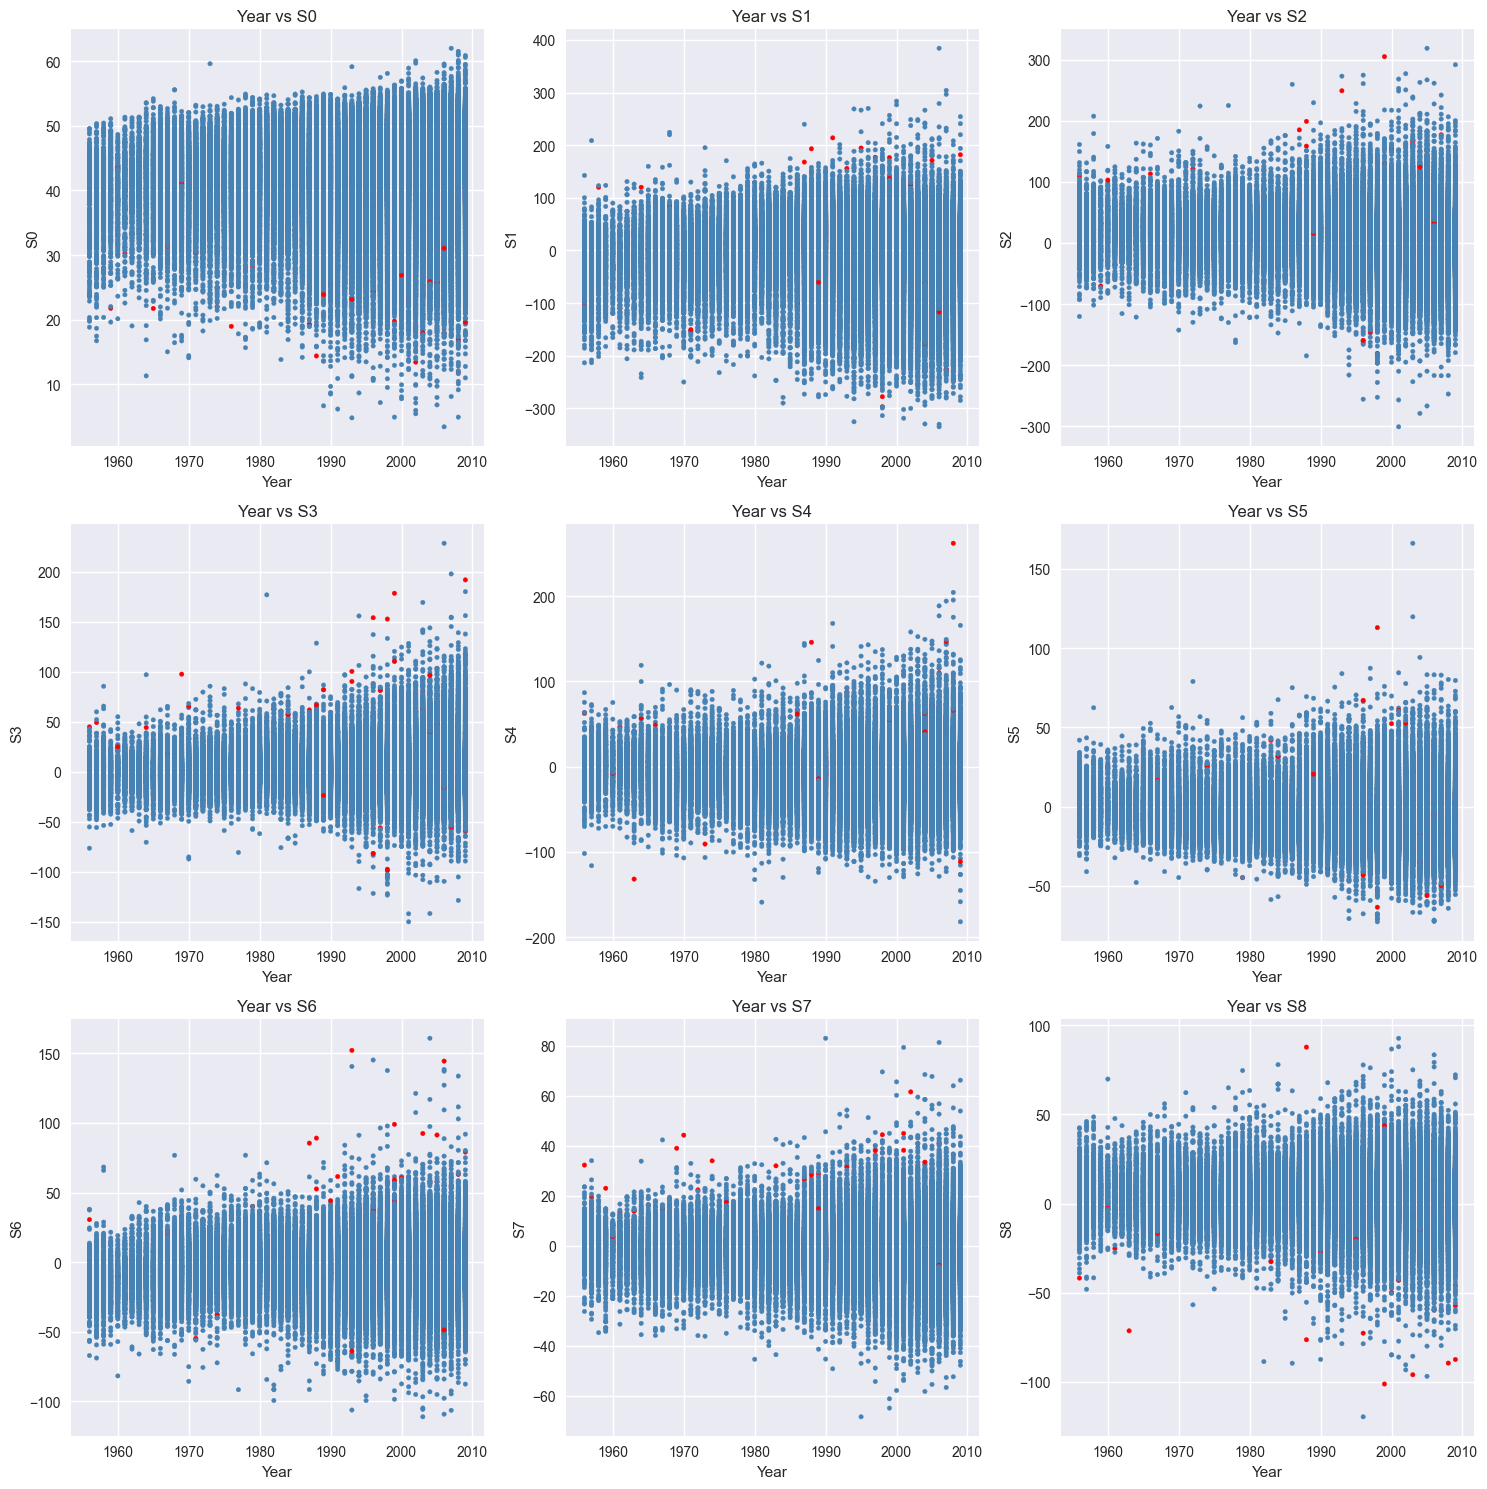

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

plt.style.use("seaborn-v0_8")

df = pd.read_csv("train.csv")

columns = [col for col in df.columns if col != "Year"]

outliers = pd.Series(index=df.index, dtype=bool)

for year in df["Year"].unique():
    subset = df[df["Year"] == year]
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.0004)
    outliers[subset.index] = lof.fit_predict(subset[columns]) == -1

print(outliers.sum())

max_subplots = 9

for i in range(0, len(columns), max_subplots):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for j, col in enumerate(columns[i : i + max_subplots]):
        colors = np.where(outliers, "red", "steelblue")
        axs[j].scatter(df["Year"], df[col], c=colors, s=10)
        axs[j].set_xlabel("Year")
        axs[j].set_ylabel(col)
        axs[j].set_title(f"Year vs {col}")

    for k in range(j + 1, max_subplots):
        fig.delaxes(axs[k])

    plt.tight_layout()
    plt.show()